In [2]:
%matplotlib inline

In [3]:
# General setup, execute this before running any other scripts
import sys
sys.path.append('..')

from tpFlow import *

# Setup output settings for notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 10)
import components.flowUtils
components.flowUtils.ANNOTATE_PROGRESS = False

## Projection of users instead of items

This experiment was not used in thesis.

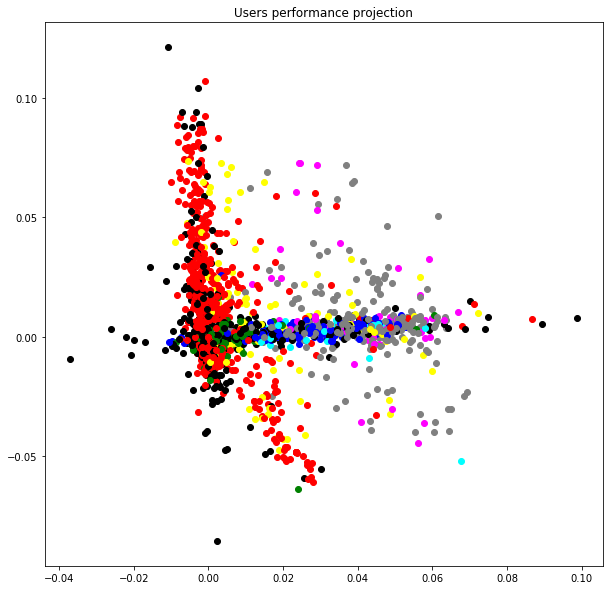

In [4]:
item_set = CONCEPTS['vyjmenovana-slova-po-b']

usersFlow = Flow("users performance projection", {
    'maxLogs': 1000000,
    'filterProblems': filterProblemsByConcept(item_set)
}, ProblemsUmime, FilterProblems)

problems = usersFlow.getProblems()
perfMatrix = usersFlow.getPerformanceMatrix(problems)
problemsPs = np.array([ [x for x in item_set if x in problem['pss']][0] for pid, problem in problems.items() ])
userGroups = perfMatrix.apply(lambda row: sum([(2 ** i) * (1 if sum(problemsPs[row.notnull()] == item_set[i]) > 30 else 0) for i in range(len(item_set)) ]), axis=1, reduce=True)

#                                             000      100    010      110       001     101        011     111
userColors = userGroups.apply(lambda group: ['black', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'gray'][group])

usersFlow = Flow("Users performance projection", {
    'filterProblems': filterProblemsByConcept(CONCEPTS['vyjmenovana-slova-po-b']),
    'lambdaColor': lambda user: userColors[user],
    'annotate': 0.0,
}, usersFlow, PerformanceUserSimilarity, LambdaColor, SimilarityMatrixPCAPlot).plot()